In [3]:
import numpy as np
import pandas as pd
import os
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

data_directory="/Users/shubhmehta/Desktop/programming/Data Science Projects/Customer Segmentation (clustering)/marketing_campaign.csv"

'for dirname, _, filenames in os.walk(data_directory):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))'

In [4]:
df = pd.read_csv(data_directory, sep="\t")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [5]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

(2240, 29)

In [6]:
df.isnull().sum() #Check for the null values in the dataframe 

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
df = df.dropna(subset=['Income']) #Drop the rows with null values in Income coloumn

In [9]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [10]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [11]:
df['Dependents'] = df['Teenhome'] + df['Kidhome']
## droping Teenhome and kidhome
df.drop(columns=['Teenhome', 'Kidhome'], inplace=True) #I do this in order to make simlified coloumns for clustering

In [12]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dependents
0,5524,1957,Graduation,Single,58138.0,04-09-2012,58,635,88,546,...,0,0,0,0,0,0,3,11,1,0
1,2174,1954,Graduation,Single,46344.0,08-03-2014,38,11,1,6,...,0,0,0,0,0,0,3,11,0,2
2,4141,1965,Graduation,Together,71613.0,21-08-2013,26,426,49,127,...,0,0,0,0,0,0,3,11,0,0
3,6182,1984,Graduation,Together,26646.0,10-02-2014,26,11,4,20,...,0,0,0,0,0,0,3,11,0,1
4,5324,1981,PhD,Married,58293.0,19-01-2014,94,173,43,118,...,0,0,0,0,0,0,3,11,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,13-06-2013,46,709,43,182,...,0,0,0,0,0,0,3,11,0,1
2236,4001,1946,PhD,Together,64014.0,10-06-2014,56,406,0,30,...,0,0,0,1,0,0,3,11,0,3
2237,7270,1981,Graduation,Divorced,56981.0,25-01-2014,91,908,48,217,...,0,1,0,0,0,0,3,11,0,0
2238,8235,1956,Master,Together,69245.0,24-01-2014,8,428,30,214,...,0,0,0,0,0,0,3,11,0,1


In [13]:
df.drop(columns=['ID','Response','Recency','NumWebVisitsMonth'], inplace=True)

In [14]:
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format='%Y').dt.year 


In [15]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y') #Formating the date in dd-mm-yyyy format

In [16]:
df['Age'] = (datetime.now().year - df['Year_Birth']) #creating a new colomn age so that we can remove the coloumns dt_customer and year_birth

In [17]:
df.drop(columns=['Year_Birth', 'Dt_Customer'], inplace=True) #As we have createrd a new coloumn 'age' we can remove these coloumns

In [18]:
# Define education categories and their corresponding ordinal mapping
education_mapping = {
    'Graduation': 4,
    'PhD': 5,
    'Master': 3,
    'Basic': 1,
    '2n Cycle': 2
}

# To encode the 'Education' column directly
df['education_encoded'] = df['Education'].map(education_mapping)

print(df.head())

    Education Marital_Status   Income  MntWines  MntFruits  MntMeatProducts  \
0  Graduation         Single  58138.0       635         88              546   
1  Graduation         Single  46344.0        11          1                6   
2  Graduation       Together  71613.0       426         49              127   
3  Graduation       Together  26646.0        11          4               20   
4         PhD        Married  58293.0       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  ...  \
0              172                88            88                  3  ...   
1                2                 1             6                  2  ...   
2              111                21            42                  1  ...   
3               10                 3             5                  2  ...   
4               46                27            15                  5  ...   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp

In [19]:
# Define marital status categories and their corresponding ordinal mapping
marital_status_mapping = {
    'Single': 1,
    'Together': 2,
    'Married': 3,
    'Divorced': 4,
    'Widow': 5,
    'Alone': 6,
    'Absurd': 7,
    'YOLO': 8
}

# Use the map method of pandas to encode the 'Marital_Status' column directly
df['maritalstatus_encoded'] = df['Marital_Status'].map(marital_status_mapping)

# Display the first few rows of the DataFrame to verify the new column
print(df.head())

    Education Marital_Status   Income  MntWines  MntFruits  MntMeatProducts  \
0  Graduation         Single  58138.0       635         88              546   
1  Graduation         Single  46344.0        11          1                6   
2  Graduation       Together  71613.0       426         49              127   
3  Graduation       Together  26646.0        11          4               20   
4         PhD        Married  58293.0       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  ...  \
0              172                88            88                  3  ...   
1                2                 1             6                  2  ...   
2              111                21            42                  1  ...   
3               10                 3             5                  2  ...   
4               46                27            15                  5  ...   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z

In [20]:
df.drop(columns=['Education', 'Marital_Status'], inplace=True)

In [21]:
df

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Dependents,Age,education_encoded,maritalstatus_encoded
0,58138.0,635,88,546,172,88,88,3,8,10,...,0,0,0,0,3,11,0,67,4,1
1,46344.0,11,1,6,2,1,6,2,1,1,...,0,0,0,0,3,11,2,70,4,1
2,71613.0,426,49,127,111,21,42,1,8,2,...,0,0,0,0,3,11,0,59,4,2
3,26646.0,11,4,20,10,3,5,2,2,0,...,0,0,0,0,3,11,1,40,4,2
4,58293.0,173,43,118,46,27,15,5,5,3,...,0,0,0,0,3,11,1,43,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,709,43,182,42,118,247,2,9,3,...,0,0,0,0,3,11,1,57,4,3
2236,64014.0,406,0,30,0,0,8,7,8,2,...,0,1,0,0,3,11,3,78,5,2
2237,56981.0,908,48,217,32,12,24,1,2,3,...,0,0,0,0,3,11,0,43,4,4
2238,69245.0,428,30,214,80,30,61,2,6,5,...,0,0,0,0,3,11,1,68,3,2


EDA

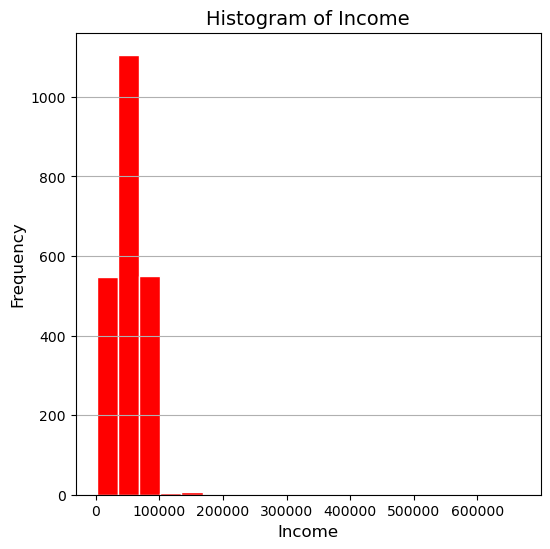

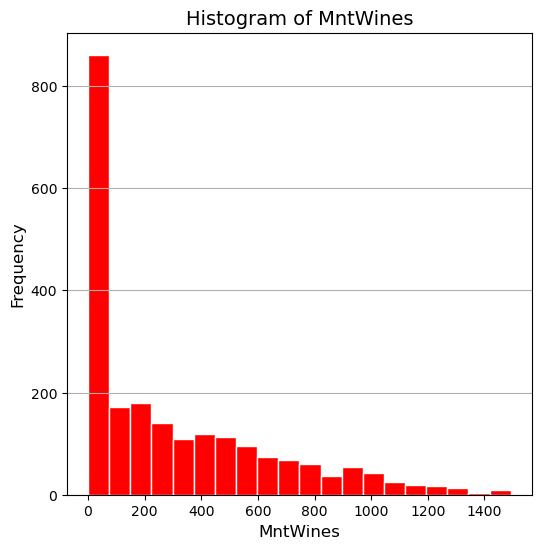

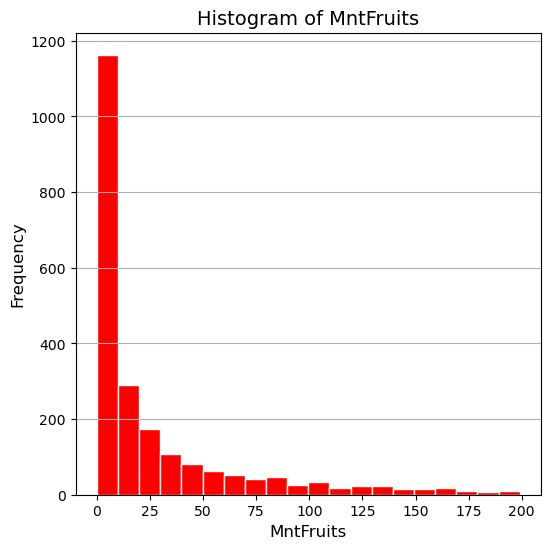

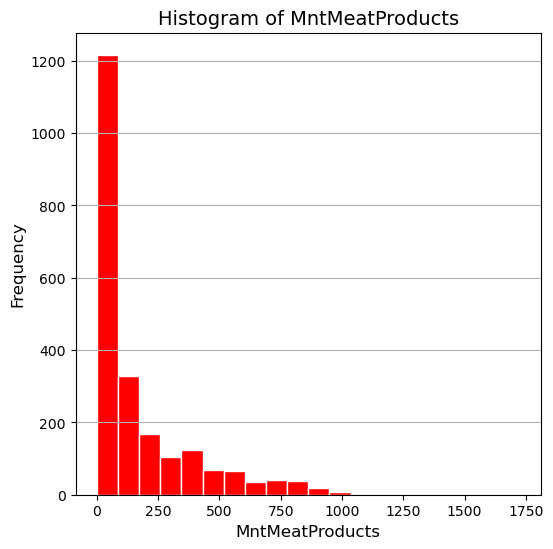

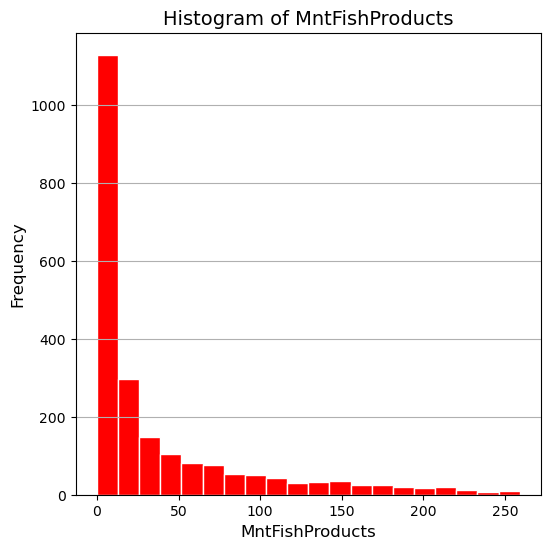

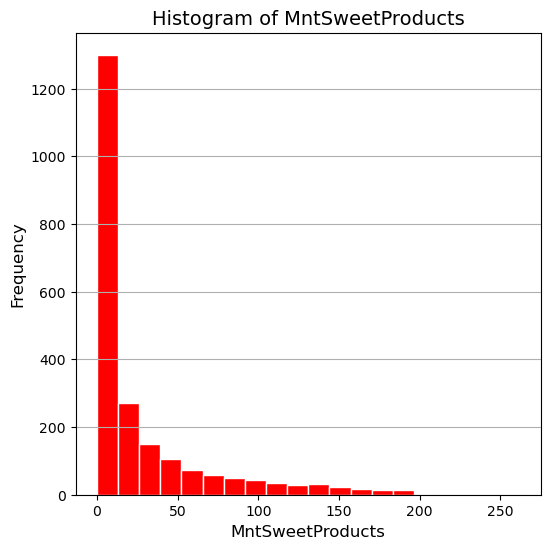

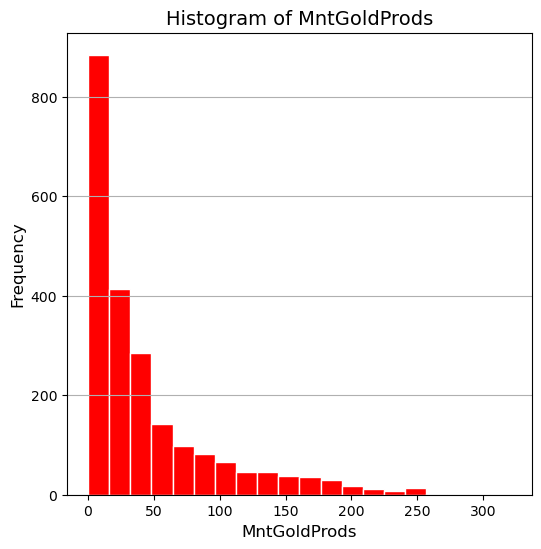

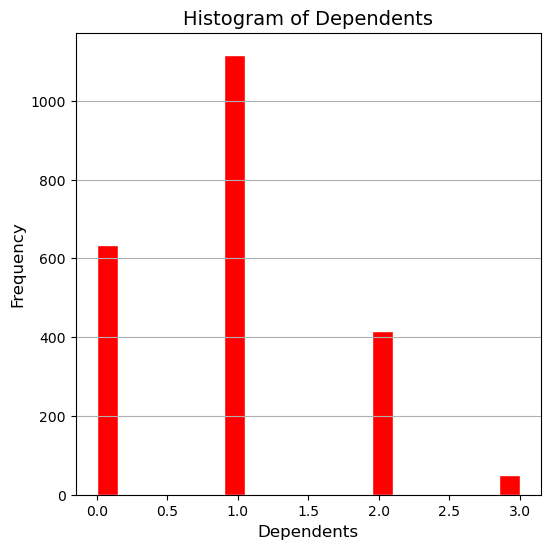

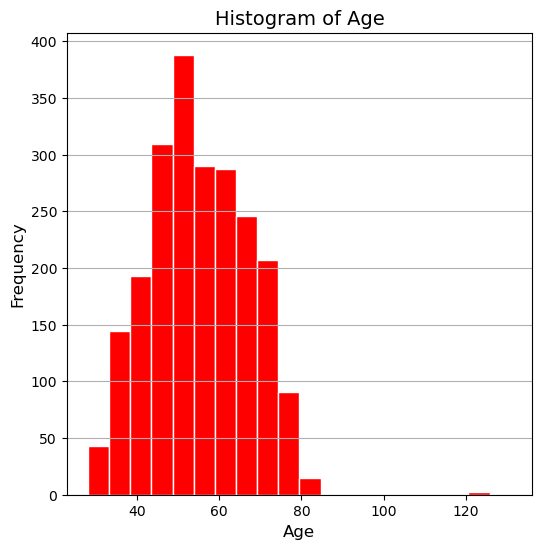

In [22]:
import matplotlib.pyplot as plt

# List of columns for which histograms will be plotted
plot_columns = [
    "Income", "MntWines", "MntFruits", "MntMeatProducts",
    "MntFishProducts", "MntSweetProducts", "MntGoldProds",
    "Dependents", "Age"
]

# Plotting histograms in a loop
for col in plot_columns:
    plt.figure(figsize=(6, 6))
    plt.hist(df[col], bins=20, color='red', edgecolor='white')
    plt.title(f'Histogram of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y')  
    plt.show()


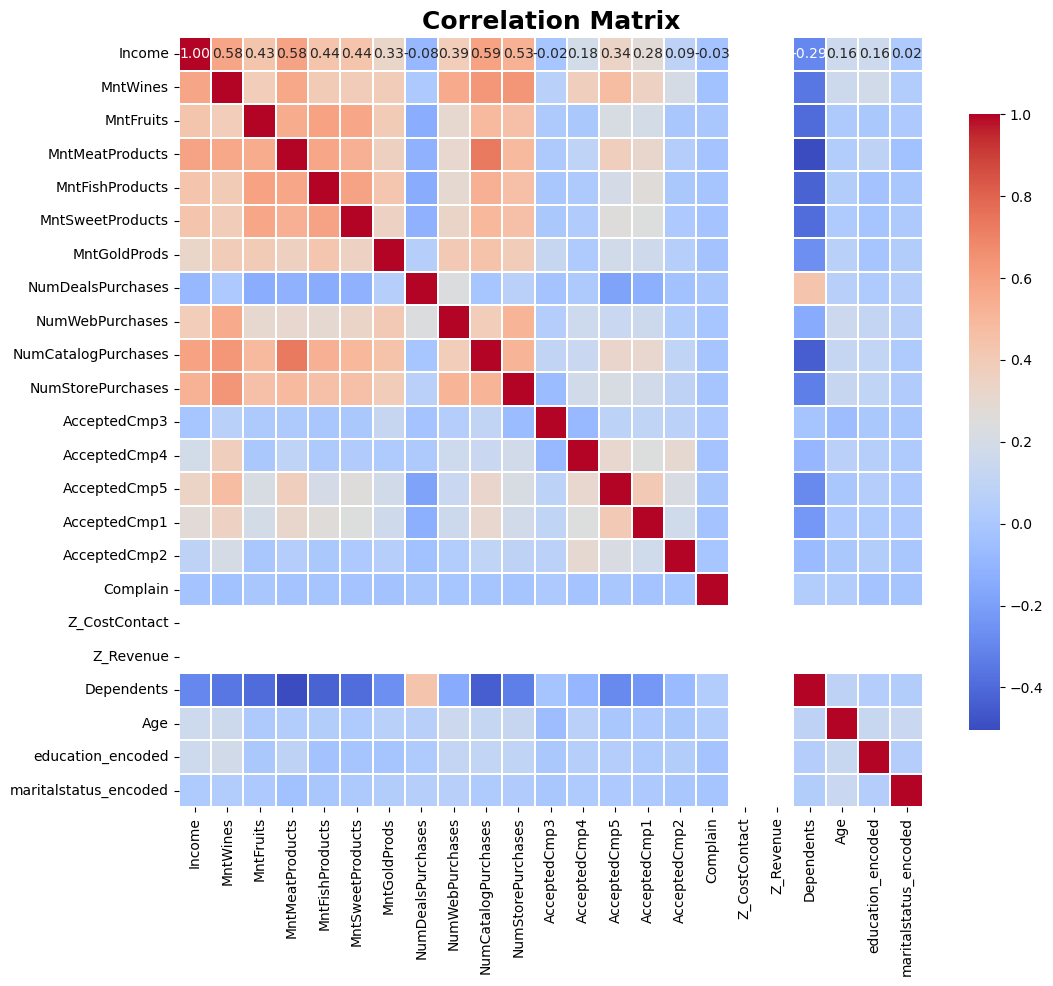

In [23]:
# Calculate correlation matrix
corr_matrix = df.corr()


plt.figure(figsize=(12, 10))  


sns.heatmap(corr_matrix, 
            cmap='coolwarm',  
            annot=True,       
            fmt=".2f",        
            linewidths=0.3,   
            cbar_kws={"shrink": .8})  


plt.title("Correlation Matrix", fontsize=18, fontweight='bold')

plt.xticks(fontsize=10)  
plt.yticks(fontsize=10)  

plt.show()

In [24]:
correlation_greater_than_04 = corr_matrix.where(corr_matrix > 0.4) #Check where the corelation values are greater than 0.4

Text(0.5, 1.0, 'Heatmap of Correlations Greater Than 0.4')

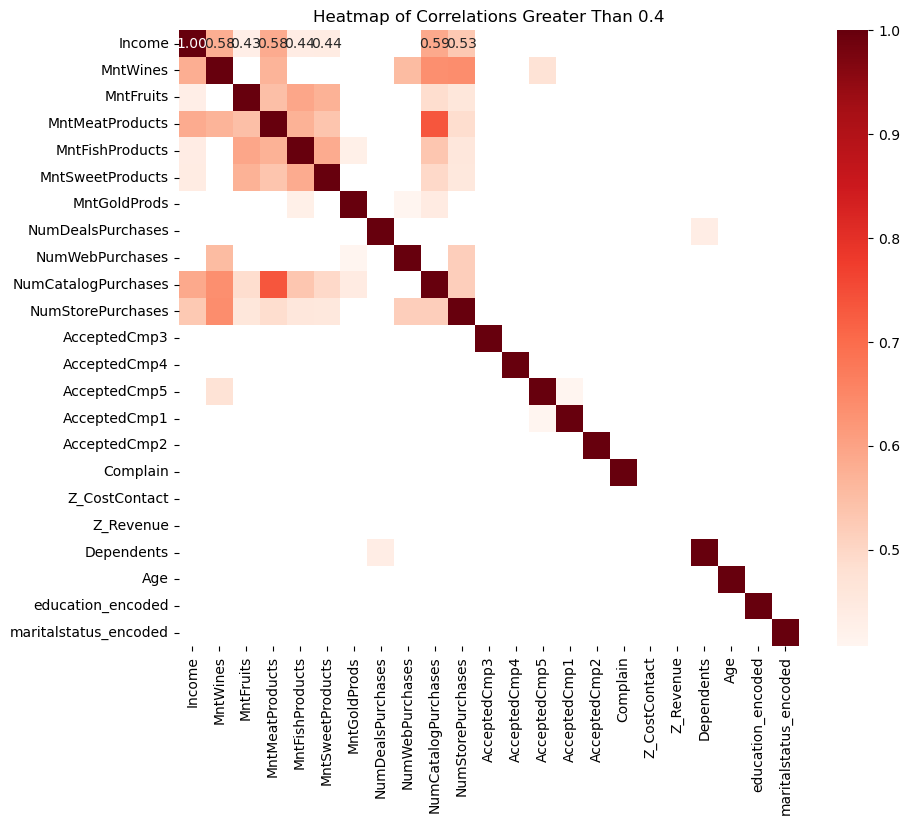

In [25]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_greater_than_04, cmap='Reds', annot=True, fmt=".2f")
plt.title('Heatmap of Correlations Greater Than 0.4')  

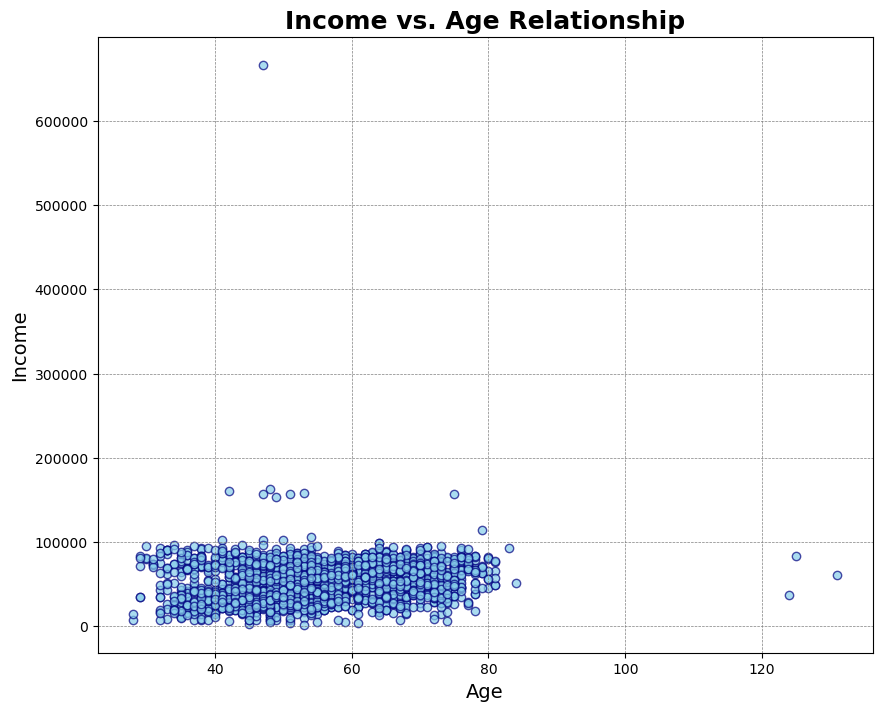

In [26]:
plt.figure(figsize=(10, 8))  
plt.scatter(df['Age'], df['Income'], color='skyblue', edgecolors='navy', alpha=0.7)  #alpha is used to set the transperancy of the bar 
plt.title('Income vs. Age Relationship', fontsize=18, fontweight='bold')  
plt.xlabel('Age', fontsize=14)  
plt.ylabel('Income', fontsize=14) 
plt.grid(which='major', linestyle='--', linewidth=0.5, color='grey') 
plt.show()

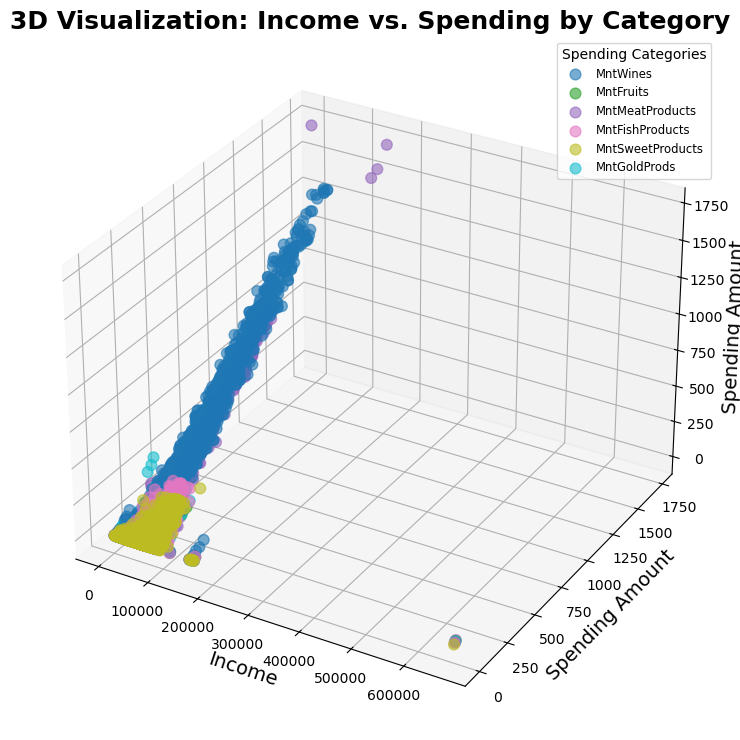

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np  # For generating a sequence of colors

# Assuming 'df' is your DataFrame with the relevant columns

columns_to_plot_spending = ["MntWines", "MntFruits", "MntMeatProducts", 
                            "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

# Initialize a 3D scatter plot
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

colors = plt.cm.tab10(np.linspace(0, 1, len(columns_to_plot_spending)))

# Ensure correct handling of z-axis values and color argument
for category, color in zip(columns_to_plot_spending, colors):
    # Here, we'll directly use 'df[category]' for the z-axis without 'zs' or 'zdir'
    ax.scatter(df['Income'], df[category], df[category], c=[color], s=60, alpha=0.6, label=category)

ax.set_xlabel('Income', fontsize=14)
ax.set_ylabel('Spending Amount', fontsize=14)
ax.set_zlabel('Spending Amount', fontsize=14)  # Adjusted for clarity
ax.set_title('3D Visualization: Income vs. Spending by Category', fontsize=18, fontweight='bold')

ax.legend(title="Spending Categories", loc='best', fontsize='small')

plt.show()


K-Means Clustering

In [28]:
from sklearn.cluster import KMeans

In [29]:
# Calculate WCSS for a range of number of clusters
wcss = []  # List to store WCSS values for each number of clusters

#loop to create and evaluate k-means instances with 1-14 clusters
for num_clusters in range(1, 15):  
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)  
    kmeans.fit(df)  # Fit the model to the data
    wcss.append(kmeans.inertia_)  # Store the WCSS value

# Now we can plot WCSS against the number of clusters to find the optimal K


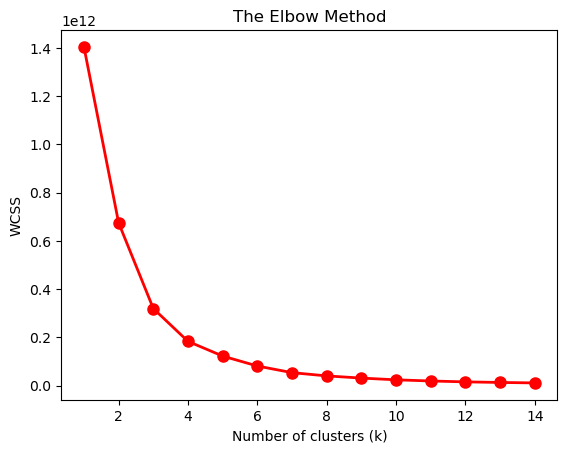

In [30]:
plt.plot(range(1, 15), wcss, color='red', marker='o', markersize=8, linewidth=2)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [31]:
# Initialize the KMeans model and directly add cluster labels to the DataFrame
df['Customer_Group'] = KMeans(n_clusters=7, init="k-means++").fit_predict(df)


In [32]:
from sklearn.metrics import silhouette_score

# Calculate the average silhouette score across all samples
y= (KMeans(n_clusters=7,init="k-means++", random_state=None)).fit_predict(df)
average_silhouette_score = silhouette_score(df, y)

# Print the average silhouette score to the console
print(f"The average silhouette score is: {average_silhouette_score:.2f}")


The average silhouette score is: 0.54


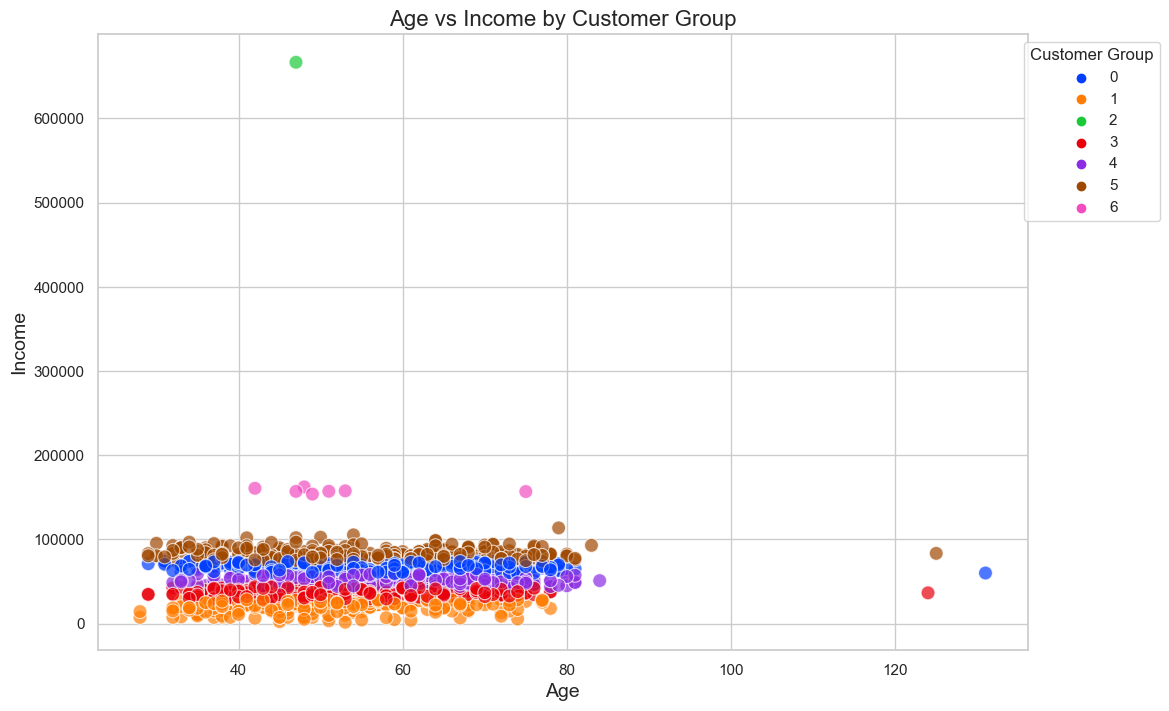

In [33]:
sns.set(style="whitegrid")
scatter_plot = sns.scatterplot(
    x='Age', 
    y='Income', 
    data=df, 
    hue='Customer_Group', 
    palette='bright', 
    s=100,            
    alpha=0.7         
)


plt.title('Age vs Income by Customer Group', fontsize=16) 
plt.xlabel('Age', fontsize=14)                           
plt.ylabel('Income', fontsize=14)                          


plt.gcf().set_size_inches(12, 8)

# Adjust legend to avoid overlapping the data points
plt.legend(title='Customer Group', loc='upper right', bbox_to_anchor=(1.15, 1))


plt.show()


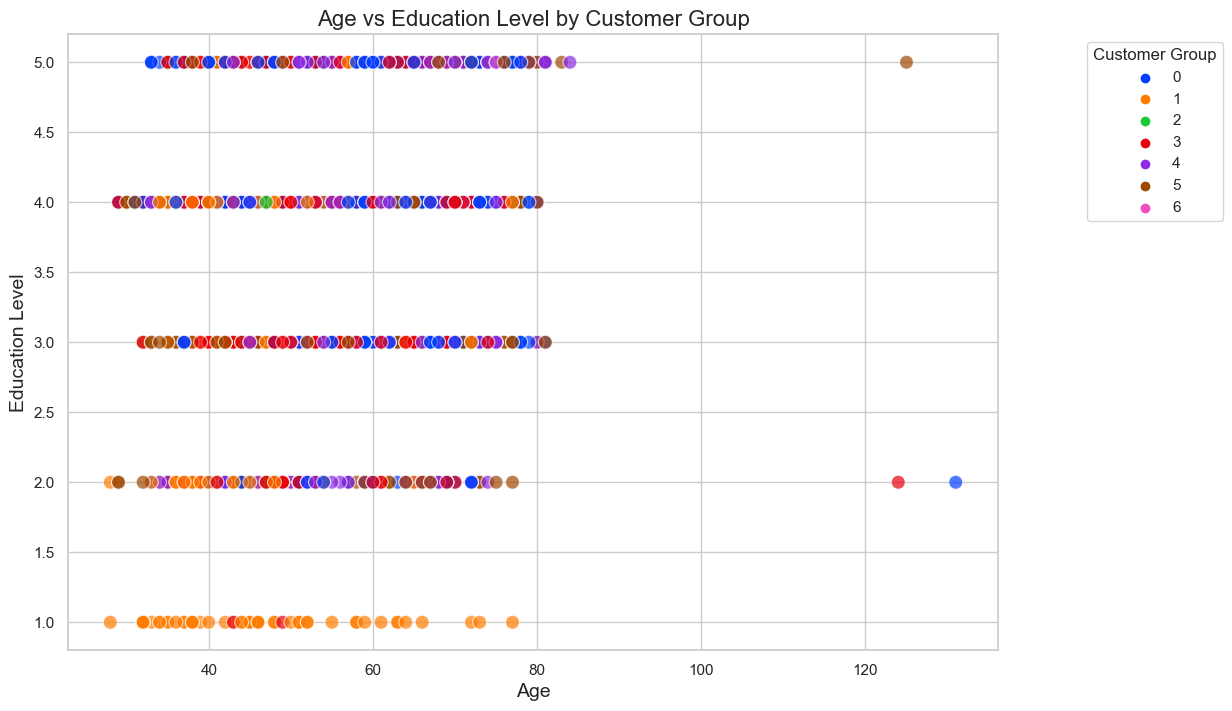

In [34]:
sns.set(style="whitegrid")

scatter_plot = sns.scatterplot(
    x='Age', 
    y='education_encoded', 
    data=df, 
    hue='Customer_Group', 
    palette='bright',     
    s=100,               
    alpha=0.7            
)


plt.title('Age vs Education Level by Customer Group', fontsize=16)  
plt.xlabel('Age', fontsize=14)                                    
plt.ylabel('Education Level', fontsize=14)                        


plt.gcf().set_size_inches(12, 8)

# Move the legend outside the plot to avoid covering data points
plt.legend(title='Customer Group', loc='upper right', bbox_to_anchor=(1.25, 1))


plt.show()

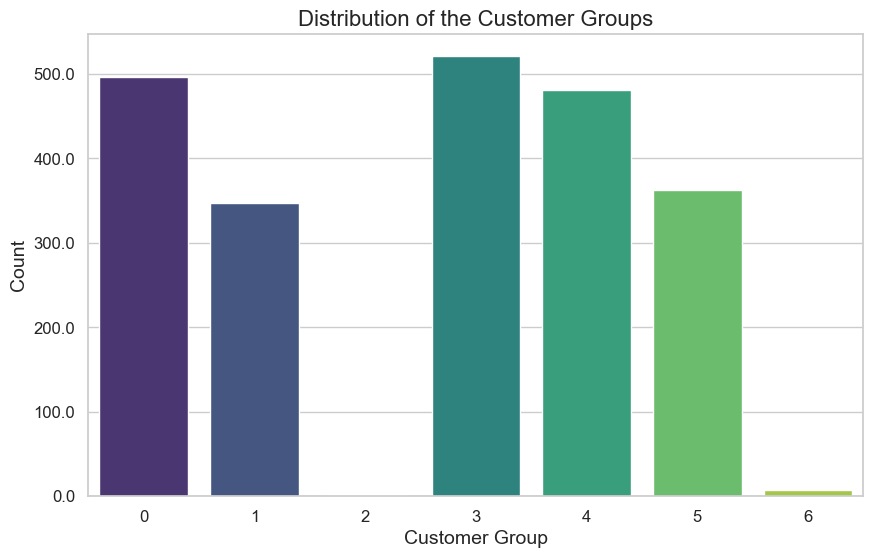

In [35]:
sns.set(style="whitegrid")

# Create the countplot with an increased figure size for better visibility
plt.figure(figsize=(10, 6))
pl = sns.countplot(x=df["Customer_Group"], palette='viridis')  # Use a visually appealing color palette

# Set a more descriptive title and adjust label sizes
pl.set_title("Distribution of the Customer Groups", fontsize=16)
pl.set_xlabel("Customer Group", fontsize=14)
pl.set_ylabel("Count", fontsize=14)

# Improve the readability of the tick labels
pl.set_xticklabels(pl.get_xticklabels(), fontsize=12)
pl.set_yticklabels(pl.get_yticks(), fontsize=12)

# Show the plot
plt.show()


Customers Expenditure on Different Products

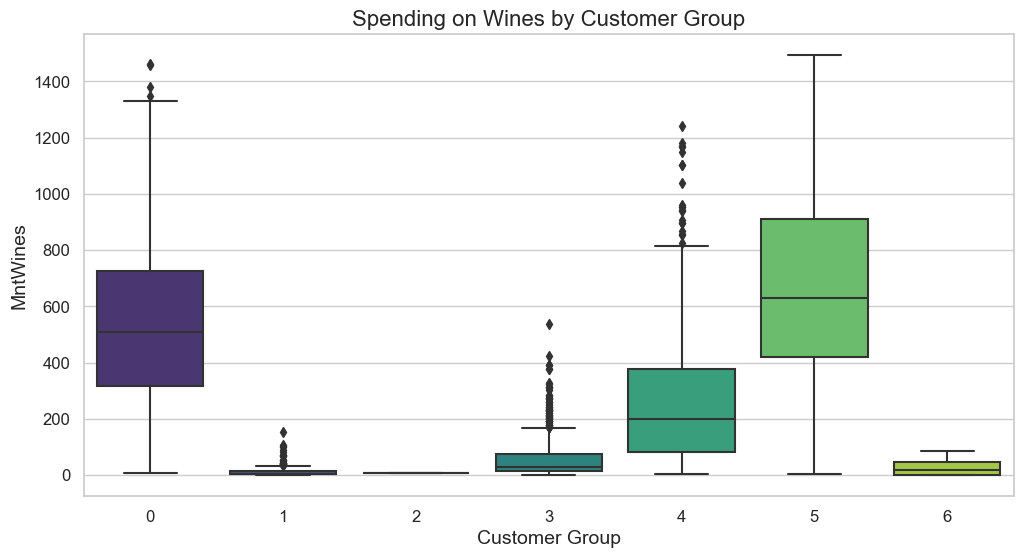

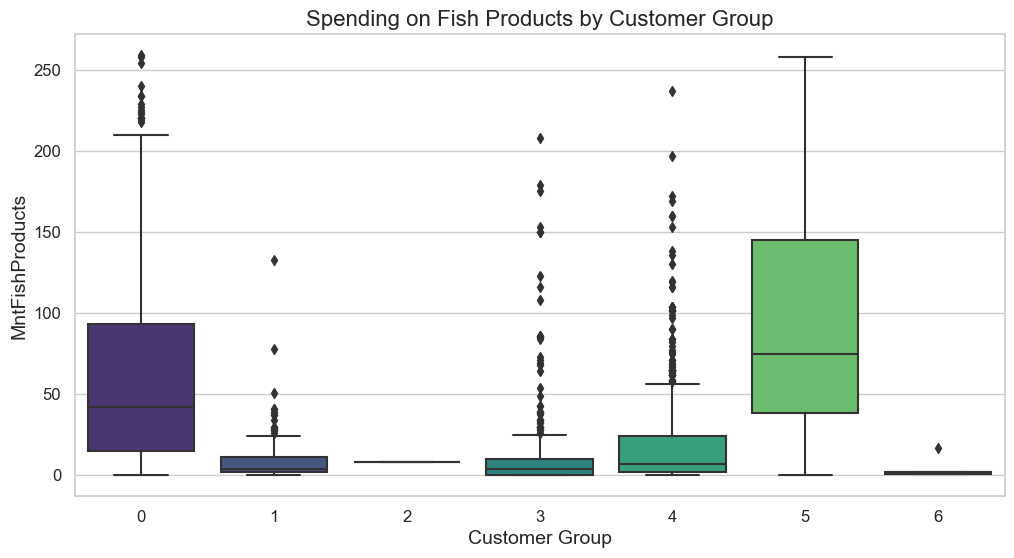

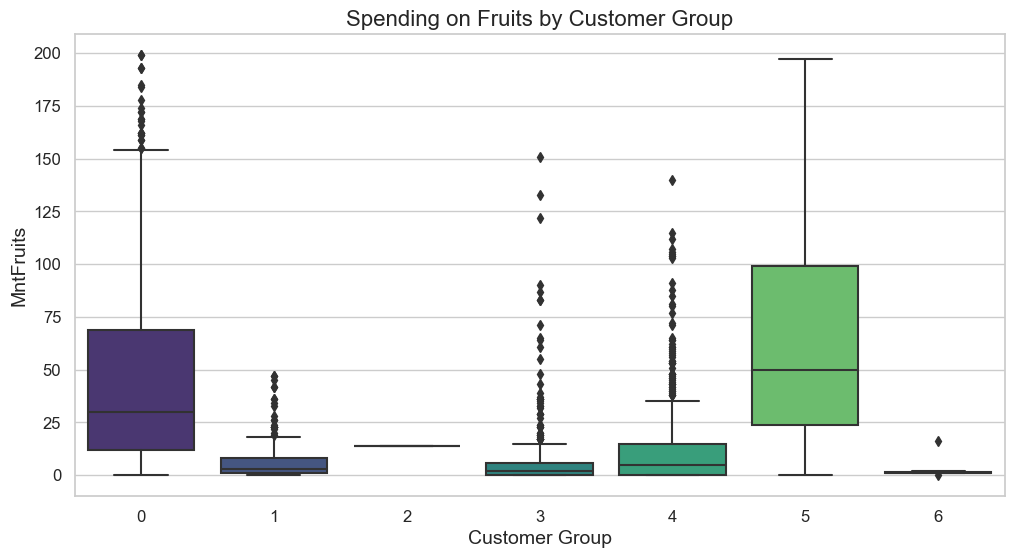

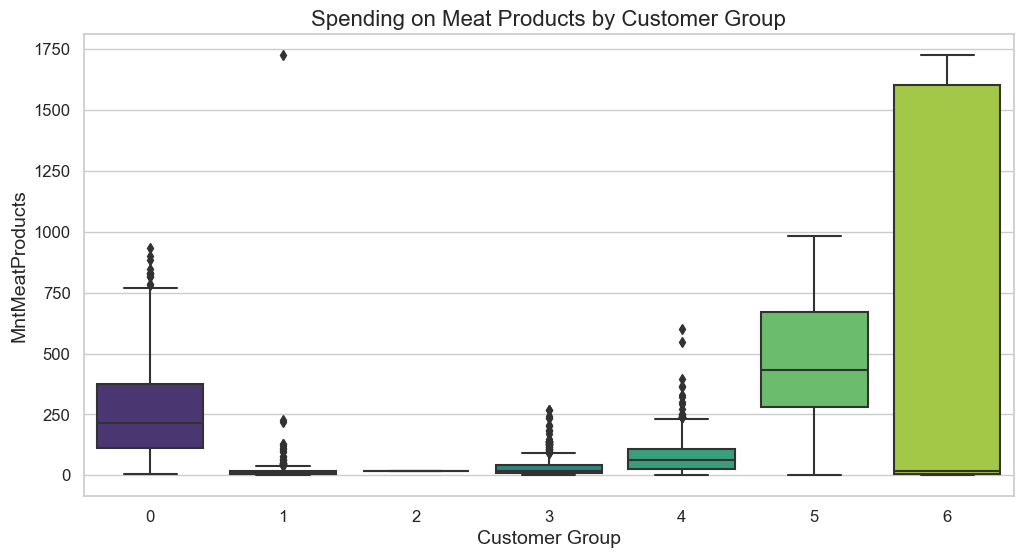

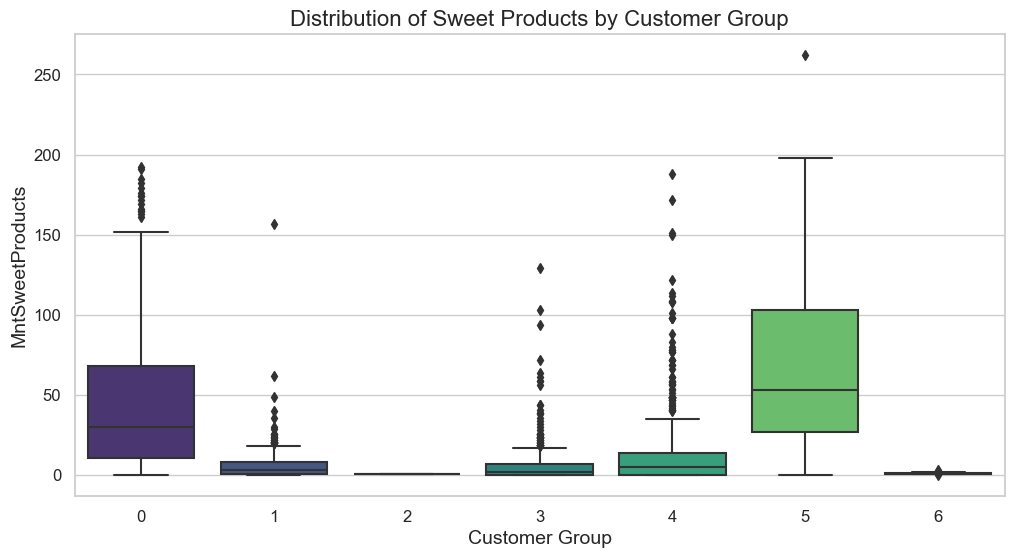

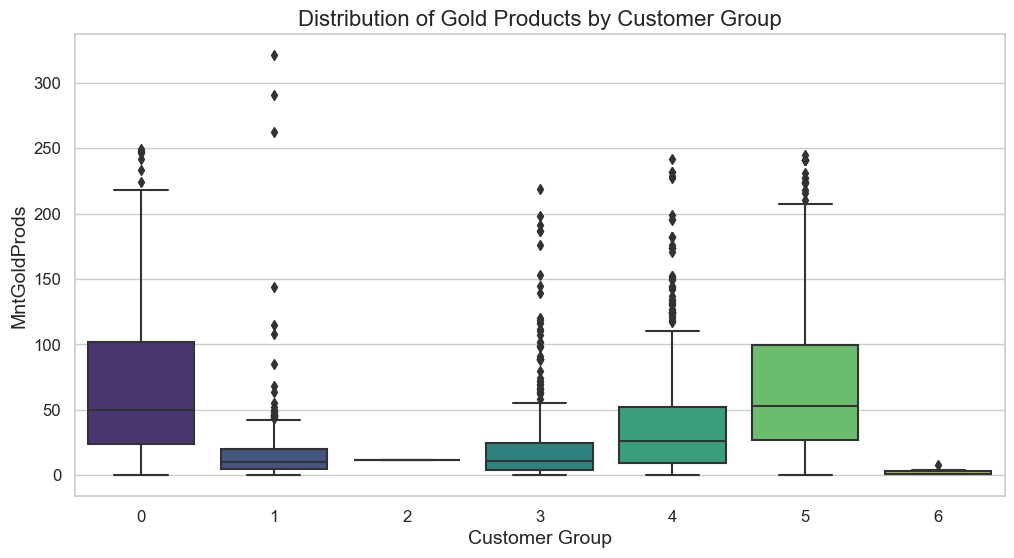

In [36]:
sns.set(style="whitegrid")  

# List of product spending categories to be plotted
spending_categories = [
    ('MntWines', 'Spending on Wines by Customer Group'),
    ('MntFishProducts', 'Spending on Fish Products by Customer Group'),
    ('MntFruits', 'Spending on Fruits by Customer Group'),
    ('MntMeatProducts', 'Spending on Meat Products by Customer Group'),
    ('MntSweetProducts', 'Distribution of Sweet Products by Customer Group'),
    ('MntGoldProds', 'Distribution of Gold Products by Customer Group')
]

#Loop to create box plots for each spending category
for category, title in spending_categories:
    plt.figure(figsize=(12, 6))  
    sns.boxplot(x='Customer_Group', y=category, data=df, palette='viridis')  
    plt.title(title, fontsize=16)  
    plt.xlabel('Customer Group', fontsize=14)  
    plt.ylabel(category, fontsize=14)
    plt.xticks(fontsize=12)  
    plt.yticks(fontsize=12)
    plt.show()


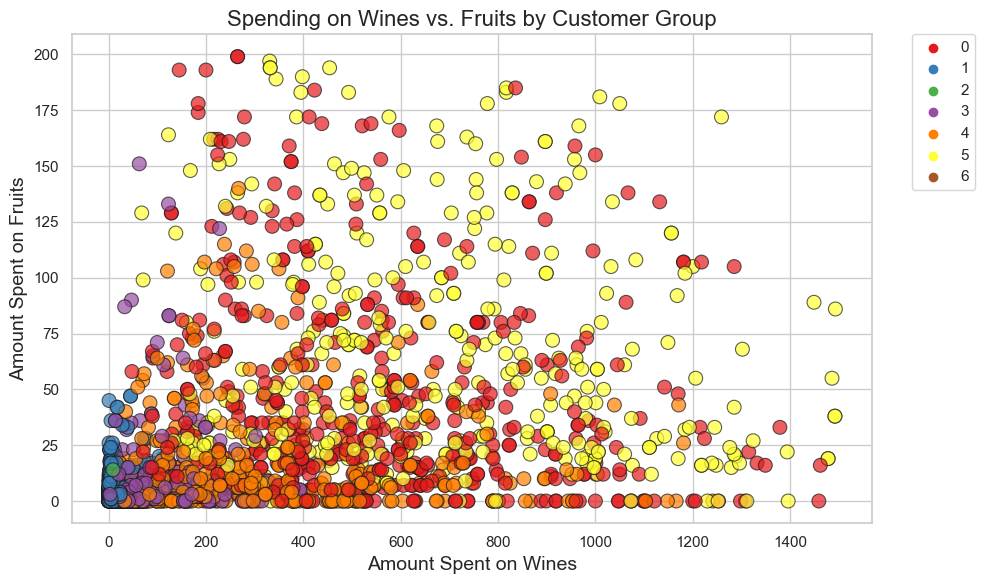

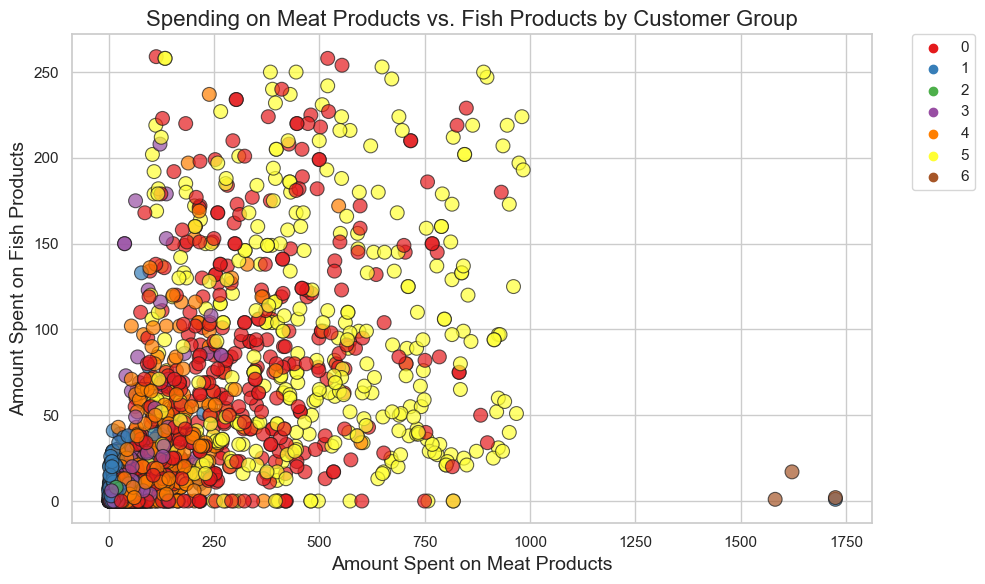

In [37]:
# Set style for a clearer background and grid
sns.set(style="whitegrid")

# Plot for Spending on Wines vs. Fruits by Customer Group
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='MntWines', y='MntFruits', hue='Customer_Group',
    palette='Set1', data=df, s=100, alpha=0.7, edgecolor='k'
)
plt.title('Spending on Wines vs. Fruits by Customer Group', fontsize=16)
plt.xlabel('Amount Spent on Wines', fontsize=14)
plt.ylabel('Amount Spent on Fruits', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()  # Adjust layout to fit title and legend
plt.show()

# Plot for Spending on Meat Products vs. Fish Products by Customer Group
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='MntMeatProducts', y='MntFishProducts', hue='Customer_Group',
    palette='Set1', data=df, s=100, alpha=0.7, edgecolor='k'
)
plt.title('Spending on Meat Products vs. Fish Products by Customer Group', fontsize=16)
plt.xlabel('Amount Spent on Meat Products', fontsize=14)
plt.ylabel('Amount Spent on Fish Products', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()  # Adjust layout to fit title and legend
plt.show()


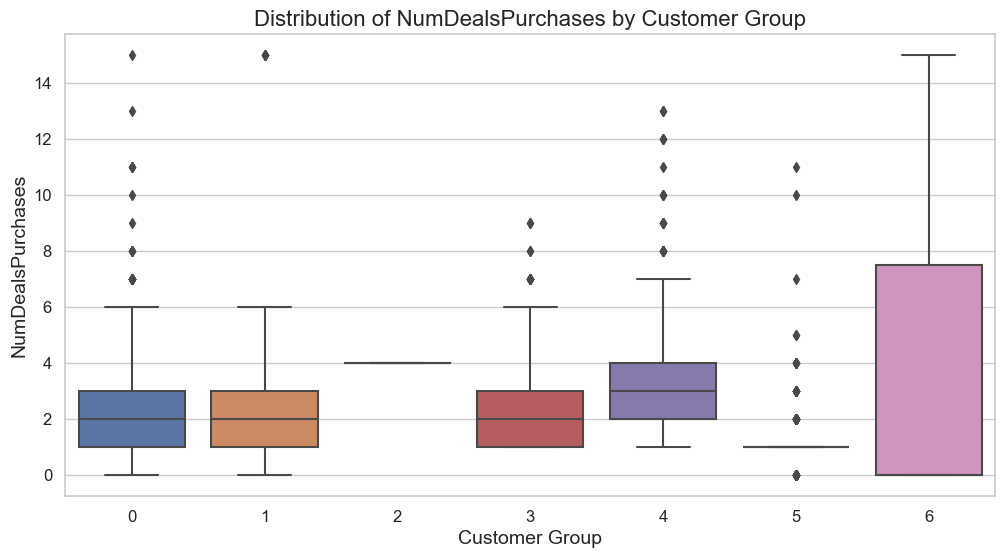

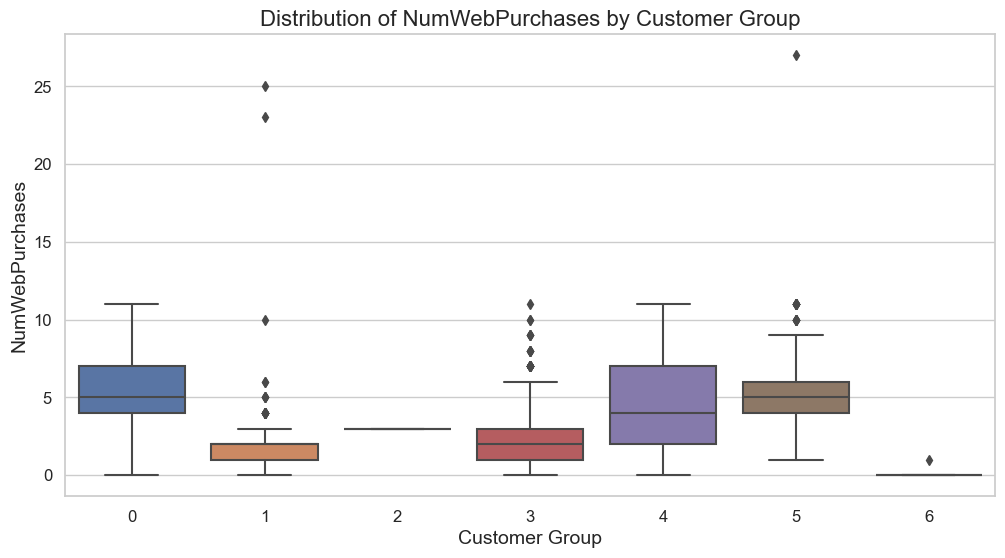

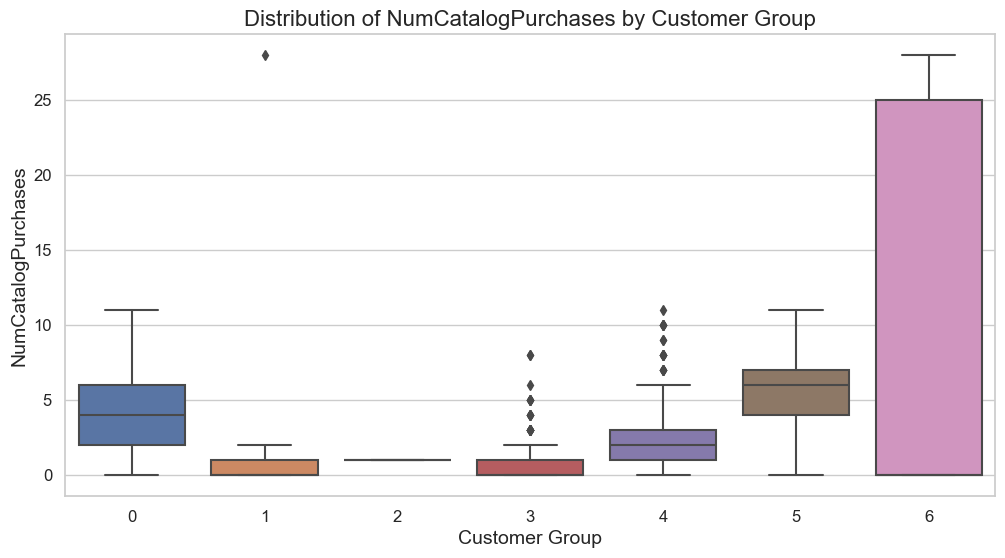

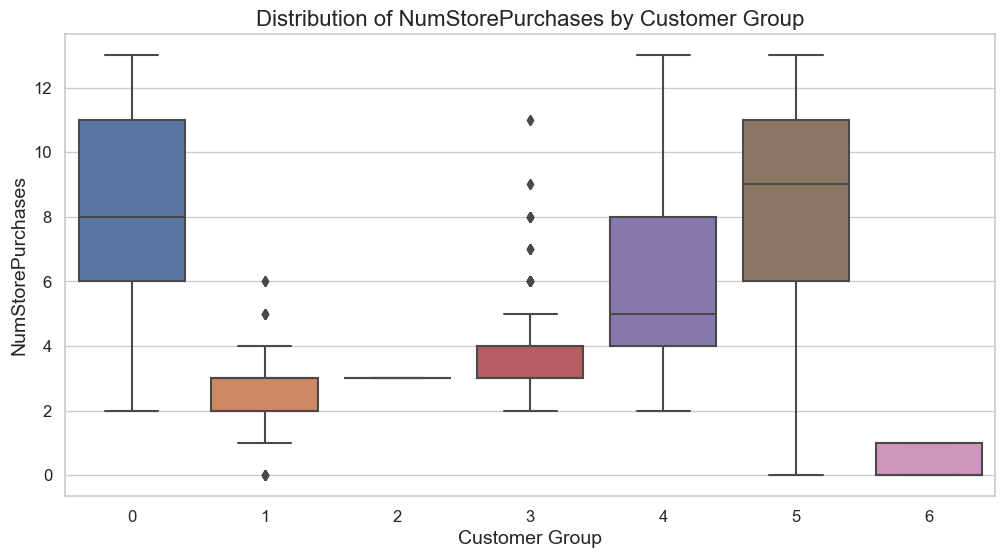

In [38]:
sns.set(style="whitegrid")

# Function to create a boxplot for a given y-variable
def create_boxplot(y_var, title, y_label):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x="Customer_Group", y=y_var)
    plt.title(title, fontsize=16)
    plt.xlabel("Customer Group", fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.xticks(fontsize=12)  # Set the x-tick labels font size
    plt.yticks(fontsize=12)  # Set the y-tick labels font size
    plt.show()

plot_details = [
    ("NumDealsPurchases", "Distribution of NumDealsPurchases by Customer Group", "NumDealsPurchases"),
    ("NumWebPurchases", "Distribution of NumWebPurchases by Customer Group", "NumWebPurchases"),
    ("NumCatalogPurchases", "Distribution of NumCatalogPurchases by Customer Group", "NumCatalogPurchases"),
    ("NumStorePurchases", "Distribution of NumStorePurchases by Customer Group", "NumStorePurchases")
]

for y_var, title, y_label in plot_details:
    create_boxplot(y_var, title, y_label)


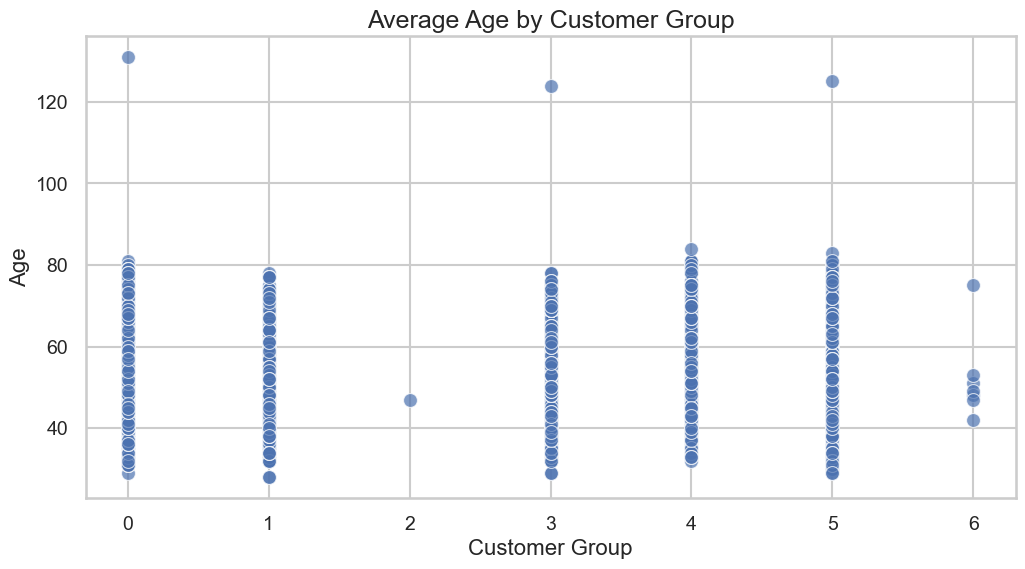

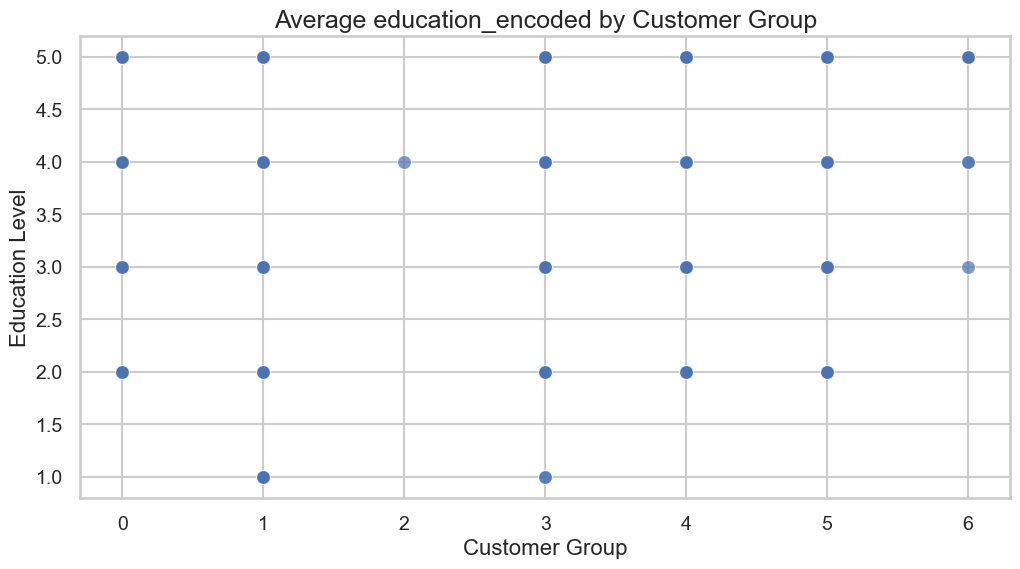

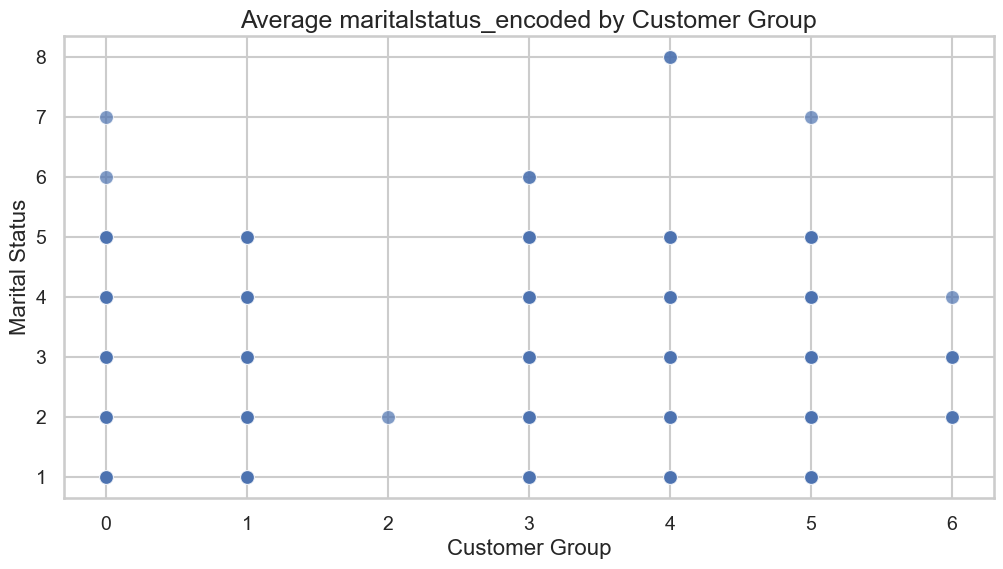

In [39]:
sns.set_theme(context='talk', style='whitegrid')

#Average Age by Customer Group
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="Customer_Group", y="Age", palette='coolwarm', s=100, alpha=0.7) 
plt.title("Average Age by Customer Group", fontsize=18)
plt.xlabel("Customer Group", fontsize=16)
plt.ylabel("Age", fontsize=16)
plt.xticks(fontsize=14) 
plt.yticks(fontsize=14) 
plt.show()

#Average education_encoded by Customer Group
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="Customer_Group", y="education_encoded", palette='coolwarm', s=100, alpha=0.7)
plt.title("Average education_encoded by Customer Group", fontsize=18)
plt.xlabel("Customer Group", fontsize=16)
plt.ylabel("Education Level", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

#Average maritalstatus_encoded by Customer Group
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="Customer_Group", y="maritalstatus_encoded", palette='coolwarm', s=100, alpha=0.7)
plt.title("Average maritalstatus_encoded by Customer Group", fontsize=18)
plt.xlabel("Customer Group", fontsize=16)
plt.ylabel("Marital Status", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
